## Towards modelling  biotechnological wastewater treatment processes through lattice Boltzmann method - Part 3

###  Extracting of data from literature studies


In this notebook, we performed an analysis of the scientific studies on mathematical modelling of biotechnological processes related to wastewater treatment systems by using the Lattice Boltzmann Method (LBM).

Particularly, this notebook shows some statistical insights comparing the studies reported in the literature and their respective references for model validation. These results can be observed in [Part 2](Part 2 - Data-analysis.ipynb) of this series, in the column 'Normalized error for model validation (%)' from our dataset.

Data presented here were extracted from original papers by using the tool [WebPlotDigitalizer](https://automeris.io/WebPlotDigitizer/).
The analysis performed was: *Root mean squared  error*, *Pearson's correlation* and *Normalized error*

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from numpy import log as ln
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from pylab import * 

## Now, we can start our analysis with data available!

### Pintelton et al. (2010)


Pintelon, T. R., Creber, S. A., Daniel A. Graf Von Der Schulenburg, & Johns, M. L. (2010).[Validation of 3D simulations of reverse osmosis membrane biofouling](https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.22717). Biotechnology and Bioengineering, 106(4), 677-689. 

*This study present a 3D simulation of Reverse Osmosis (RO) membrane biofouling based on a lattice Boltzmann (LB) platform that authors subsequently favorably compared with experimental data. This data consists of temporally (and spatially) resolved velocity measurements acquired for a RO membrane using magnetic resonance techniques. The effect of biofilm cohesive strength on system pressure drop is then explored; weaker biomass is observed to have a reduced impact on pressure drop (per unit biomass accumulated).*

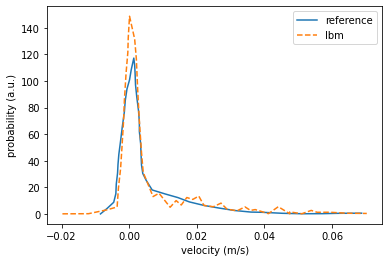

RMSE: 30.977
Pearson correlation: 0.743
Normalized Error (percent) : 56.71


In [2]:
#Case a

pintelton = pd.read_csv('pintelton2010_a.csv', encoding='utf-8', sep=';', header=None)
pintelton1 = pd.read_csv('pintelton2010_a1.csv', encoding='utf-8', sep=';', header=None)
x_a = pintelton[0]
experimental = pintelton[1]
x_b = pintelton1[0]
lbm_b = pintelton1[1]

plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('velocity (m/s)')
plt.ylabel('probability (a.u.)')
plt.show()

#RMSE: root mean squared  error
y_true = experimental
y_pred = lbm_b
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm_b)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

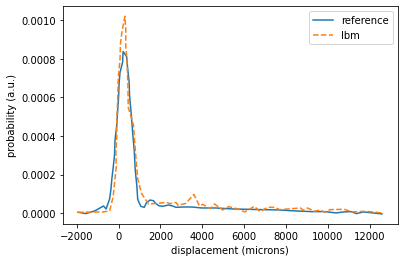

RMSE: 0.0002
Pearsons correlation: 0.795
Normalized Error (percent) : 57.68
Mean RMSE: 15.49
Mean corr: 0.79
Mean Normalized Error (percent) : 57.20


In [3]:
#Case b

pinteltonb = pd.read_csv('pintelton2010_b.csv', encoding='utf-8', sep=';', header=None)
pintelton1b = pd.read_csv('pintelton2010_b1.csv', encoding='utf-8', sep=';', header=None)
x_a2 = pinteltonb[0]
experimentalb = pinteltonb[1]
x_b2 = pintelton1b[0]
lbm_b2 = pintelton1b[1]

plt.plot(x_a2, experimentalb, '-', x_b2, lbm_b2, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('displacement (microns)')
plt.ylabel('probability (a.u.)')
plt.show()

#RMSE: root mean squared  error  
y_true = experimentalb
y_pred = lbm_b2
rmse_val2 = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.4f' %rmse_val2 )

#Pearson corr
corr, _ = pearsonr(experimentalb, lbm_b2)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimentalb - lbm_b2)**2)))
b = np.sqrt(np.sum((experimentalb)**2))
err_b = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err_b)

#Mean for RMSE
mean = (rmse_val +rmse_val2)/2
print ('Mean RMSE: %.2f' % mean)

#Mean for Pearson corr
mean = (corr +corr)/2
print ('Mean corr: %.2f' % mean)

#Mean for Normalized Error
mean = (err + err_b)/2
print ('Mean Normalized Error (percent) : %.2f' % mean)

### Yang et al. (2011)

Yang, Y., Liao, Q., Zhu, X., Wang, H., Wu, R., & Lee, D. (2011). [Lattice Boltzmann simulation of substrate flow past a cylinder with PSB biofilm for bio-hydrogen production](https://www.sciencedirect.com/science/article/abs/pii/S0360319911008573). International Journal of Hydrogen Energy, 36(21), 14031-14040.

*Based on hydrogen production by photosynthetic bacteria (PSB) in biofilm bioreactor, in the present study, a substrate solution with specific inlet concentration flowing past a circular cylinder with biochemical reaction in an attached thin PSB biofilm is numerically simulated by applying the lattice Boltzmann method (LBM). A non-equilibrium extrapolation method is employed to handle the velocity and concentration curved boundary. The model is validated by available theoretical and numerical results in terms of the drag and lift coefficients and concentration profiles.*

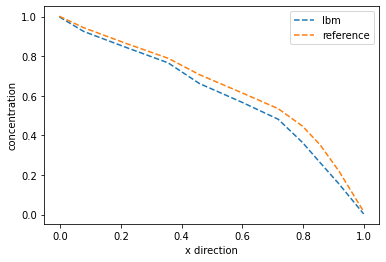

RMSE: 0.050
Pearsons correlation: 0.997
Normalized Error (percent) : 7.58


In [4]:
#case a

yang = pd.read_csv('yang2011_a.csv', encoding='utf-8', sep=';', header=None)
x = yang[0]
experimental = yang[1]
x1 = yang[2]
lbm = yang[3]

plt.plot(x, lbm, '--', x, experimental, '--')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('x direction')
plt.ylabel('concentration')
plt.show()

#RMSE: root mean squared  error 
y_true = experimental
y_pred = lbm
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

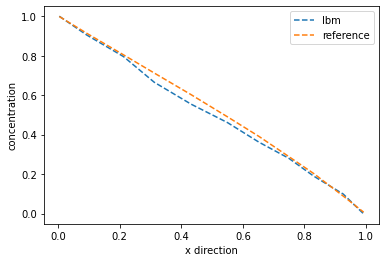

RMSE: 0.050
Pearsons correlation: 0.998
Normalized Error (percent) : 4.19
Mean RMSE: 0.0374
Mean corr: 0.9985
Mean Normalized Error (percent) : 5.8813


In [5]:
#case b

yang = pd.read_csv('yang2011_b.csv', encoding='utf-8', sep=';', header=None)
x = yang[0]
experimental = yang[1]
x1 = yang[2]
lbm = yang[3]

plt.plot(x, lbm, '--', x, experimental, '--')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('x direction')
plt.ylabel('concentration')
plt.show()

#RMSE: root mean squared  error  
from sklearn.metrics import mean_squared_error
y_true = experimental
y_pred = lbm
rmse_val2 = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a2= np.sqrt(np.sum(((experimental - lbm)**2)))
b2 = np.sqrt(np.sum((experimental)**2))
err_b = (a2/b2)*100
print ('Normalized Error (percent) : %.2f' % err_b)


#Mean for RMSE
mean = (rmse_val +rmse_val2)/2
print ('Mean RMSE: %.4f' % mean)

#Mean for Pearson corr
mean = (corr +corr)/2
print ('Mean corr: %.4f' % mean)

#Mean for Normalized Error
mean = (err + err_b)/2
print ('Mean Normalized Error (percent) : %.4f' % mean)

### Tang et al. (2013)

Tang, Y., Valocchi, A. J., Werth, C. J., & Liu, H. (2013). [An improved pore-scale biofilm model and comparison with a microfluidic flow cell experiment](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013WR013843)
. Water Resources Research, 49(12), 8370-8382. 

*This work presents a pore‐scale biofilm model that solves the flow field using the lattice Boltzmann method, the concentration field of chemical species using the finite difference method, and biofilm development using the cellular automaton method. The pore‐scale biofilm model was evaluated against a previously published pore‐scale biofilm experiment, in which two microfluidic flow cells, one with a homogeneous pore network and the other with an aggregate pore network, were tested for aerobic degradation of a herbicide. The simulated biofilm distribution and morphology, biomass accumulation, and contaminant removal were consistent with the experimental data. 
The computational time of this model was reduced 90% compared to group's prior works due to implementation of biofilm shrinkage in the cellular automaton method. *

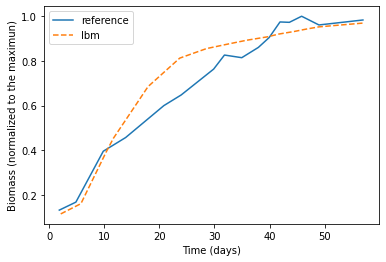

RMSE: 0.034
Pearsons correlation: 0.993
Normalized Error (percent) : 4.42


In [6]:
#case a: aggregate
tang = pd.read_csv('tanga.csv', encoding='utf-8', sep=';', header=None)  ##experimental
tang1 = pd.read_csv('tangb.csv', encoding='utf-8', sep=';', header=None) ##model

x_a = tang[0]
experimental = tang[1]
x_b = tang1[0]
lbm_b = tang1[1]
plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('Time (days)')
plt.ylabel('Biomass (normalized to the maximun)')
plt.show()

#RMSE: root mean squared  error  
y_true = experimental
y_pred = lbm_b
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm_b)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

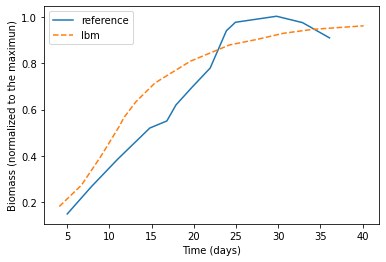

RMSE: 0.034
Pearsons correlation: 0.992
Normalized Error (percent) : 5.52
Mean RMSE: 0.0371
Mean corr: 0.9922
Mean Normalized Error (percent) : 4.8523


In [7]:
#case b: Homogeneus

tang = pd.read_csv('tang_2013-homo_a.csv', encoding='utf-8', sep=';', header=None)  ##experimental
tang1 = pd.read_csv('tang_2013-homo_b.csv', encoding='utf-8', sep=';', header=None) ##model

x_a = tang[0]
experimental = tang[1]
x_b = tang1[0]
lbm_b = tang1[1]
plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('Time (days)')
plt.ylabel('Biomass (normalized to the maximun)')
plt.show()

#RMSE: root mean squared  error 
y_true = experimental
y_pred = lbm_b
rmse_val2 = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr2, _ = pearsonr(experimental, lbm_b)
print('Pearsons correlation: %.3f' % corr2)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

#Mean for RMSE
mean = (rmse_val +rmse_val2)/2
print ('Mean RMSE: %.4f' % mean)

#Mean for Pearson corr
mean = (corr + corr2)/2
print ('Mean corr: %.4f' % mean)

#Mean for Normalized Error
mean = (err + err_b)/2
print ('Mean Normalized Error (percent) : %.4f' % mean)

### Štumbauer et al. (2013)

Štumbauer, V., Petera, K., & Štys, D. (2013). [The lattice Boltzmann method in bioreactor design and simulation](https://www.sciencedirect.com/science/article/pii/S0895717711008077). Mathematical and Computer Modelling, 57(7-8), 1913-1918.

*In this paper, authors verified the applicability of the LBM in a special case of a Couette–Taylor photobioreactor—a device comprised of two coaxial cylinders with a rotating inner wall. An appropriate numerical approach to the curved moving wall boundary condition was presented and verified by velocity flow field comparison with analytical solution. The parallelism potential of the LBM was exploited on the parallel platform of CUDA (Compute Unified Device Architecture). Microalgae growth in the flow field simulated by the LBM was based on the photosynthetic factory (PSF) model treated in a parallel stochastic manner and implemented also on the parallel platform of CUDA. The parallel stochastic PSF solver was validated by comparison with an analytical solution of the PSF model at constant irradiance.*

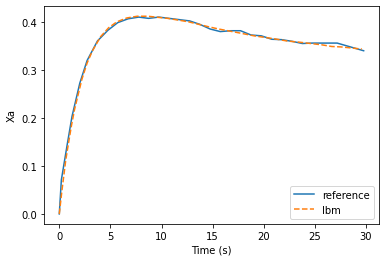

RMSE: 0.038
Pearsons correlation: 0.956
Normalized Error (percent) : 10.88


In [8]:
# condition I/Iopt=1

stumbauer = pd.read_csv('stumbauer2013_analytic.csv', encoding='utf-8', sep=';', header=None)
stumbauer1 = pd.read_csv('stumbauer2013_lbm.csv', encoding='utf-8', sep=';', header=None)

x_a = stumbauer[0]
experimental = stumbauer[1]
x_b = stumbauer1[0]
lbm_b = stumbauer1[1]
plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('Time (s)')
plt.ylabel('Xa')
plt.show()

#RMSE: root mean squared  error  
y_true = experimental
y_pred = lbm_b
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm_b)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

### Liao et al. (2013)

Liao, Q., Yang, Y. X., Zhu, X., & Chen, R. (2013). [Lattice Boltzmann simulation of substrate solution through a porous granule immobilized PSB-cell for biohydrogen production](https://www.sciencedirect.com/science/article/abs/pii/S036031991300949X). International Journal of Hydrogen Energy, 38(35), 15700-15709.

*A bioreaction system of substrate solution through a porous granule immobilized photosynthetic bacteria-cell for photobiohydrogen production was simulated by the LB model coupled with a multi-block strategy. The effects on flow and mass transfer were investigated by illumination intensity, influent velocity, permeability and porosity of porous granule. Additionally, hydrogen production performance including hydrogen yield and substrate consumption efficiency were assessed.*

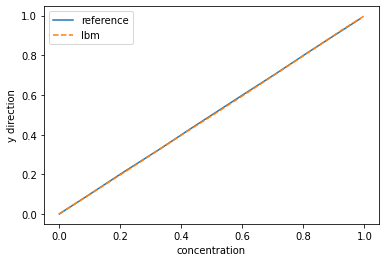

RMSE: 0.089
Pearsons correlation: 0.990
Normalized Error (percent) : 16.13


In [9]:
liao = pd.read_csv('liao2013.csv', encoding='utf-8', sep=';', header=None)

x_a = liao[0]
experimental = liao[1]
x_b = liao[2]
lbm_b = liao[3]

plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['reference', 'lbm'], loc = 'best')
plt.xlabel('concentration')
plt.ylabel('y direction')
plt.show()

#RMSE: root mean squared  error  
y_true = experimental
y_pred = lbm_b
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm_b)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

### Benioug et al. (2017)

Benioug, M., Golfier, F., Oltéan, C., Buès, M., Bahar, T., & Cuny, J. (2017). [An immersed boundary-lattice Boltzmann model for biofilm growth in porous media](https://www.sciencedirect.com/science/article/abs/pii/S0309170816302986). Advances in Water Resources, 107, 65-82. 

*In this paper, authors present a 2D pore-scale numerical model to investigate the main mechanisms governing biofilm growth in porous media. The fluid flow and solute transport equations were coupled with a biofilm evolution model. Fluid flow was simulated with an immersed boundary–lattice Boltzmann model while solute transport was described with a volume-of-fluid-type approach. A cellular automaton algorithm combined with immersed boundary methods was developed to describe the spreading and distribution of biomass. Bacterial attachment and detachment mechanisms were also taken into account. The capability of this model to describe correctly the couplings involved between fluid circulation, nutrient transport and bacterial growth was tested under different hydrostatic and hydrodynamic conditions (i) on a flat medium and (ii) for a complex porous medium. For the second case, different regimes of biofilm growth wereidentified and were found to be related to the dimensionless parameters of the model, Damköhler and Péclet numbers and dimensionless shear stress. Finally, the impact of biofilm growth on the macroscopic properties of the porous medium was investigated and we discuss the unicity of the relationships between hydraulic conductivity and biofilm volume fraction.*

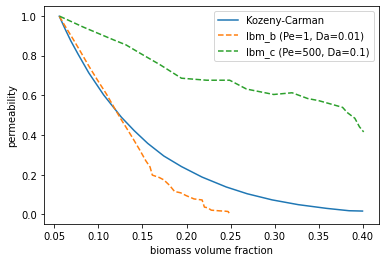

Normalized Error lbm_b (percent) : 21.50
Normalized Error lbm_c (percent) : 70.83
Mean Error: 46.16


In [10]:
benioug_a = pd.read_csv('benioug_a.csv', encoding='utf-8', sep=';', header=None)
benioug_b = pd.read_csv('benioug_b.csv', encoding='utf-8', sep=';', header=None)
benioug_c = pd.read_csv('benioug_c.csv', encoding='utf-8', sep=';', header=None)

x_a = benioug_a[0]
experimental = benioug_a[1]
x_b = benioug_b[0]
lbm_b = benioug_b[1]
x_c = benioug_c[0]
lbm_c = benioug_c[1]

plt.plot(x_a, experimental, '-', x_b, lbm_b, '--', x_c, lbm_c, '--')
plt.legend(['Kozeny-Carman', 'lbm_b (Pe=1, Da=0.01)', 'lbm_c (Pe=500, Da=0.1)'], loc = 'best')
plt.xlabel('biomass volume fraction')
plt.ylabel('permeability')
plt.show()

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error lbm_b (percent) : %.2f' % err)

a1= np.sqrt(np.sum(((experimental - lbm_c)**2)))
b1 = np.sqrt(np.sum((experimental)**2))
err1 = (a1/b1)*100
print ('Normalized Error lbm_c (percent) : %.2f' % err1)

err_mean=(err +err1)/2
print ('Mean Error: %.2f' % err_mean)

### Fortunato et al. (2018)

Fortunato, V. A., Caneppele, F. L., Ribeiro, R., & Rabi, J. A. (2017). [Development of in-house lattice-Boltzmann simulator of bioreactors for wastewater treatment: Basic concepts and initial results](https://iwaponline.com/wst/article-abstract/77/3/838/38535/Development-of-in-house-lattice-Boltzmann?redirectedFrom=fulltext). Water Science and Technology, 77(3), 838-847. 

*With vinasse treatment as case study, this work is a first step towards a comprehensive LBM simulator of a continuous-flow anaerobic packed-bed reactor. Extensions from typical models comprise one-dimensional (besides time) dependence, species transport via convection and diffusion, and imposition of either Dirichlet or Danckwerts condition at inlet. The LBM simulator proved to be operational when simulating the bioreactor at different hydraulic retention times (HRTs). Simulated profiles show that stepwise feeding concentrations are smoothed as they are transported towards the bioreactor exit while concentrations increase or decrease in response to generation or degradation kinetics.*

In [11]:
htr8 = pd.read_csv('fortunato2018_htr8.csv', encoding='utf-8', sep=',', header=None)
htr12 = pd.read_csv('fortunato2018_htr12.csv', encoding='utf-8', sep=',', header=None)
htr16 = pd.read_csv('fortunato2018_htr16.csv', encoding='utf-8', sep=',', header=None)
htr24 = pd.read_csv('fortunato2018_htr24.csv', encoding='utf-8', sep=',', header=None)

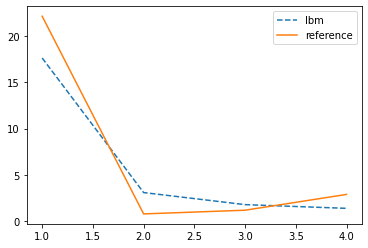

RMSE: 2.65
Pearson correlation: 0.985
Normalized Error (percent) : 23.75


In [12]:
#case a: HRT of 8 hrs
species = htr8[1]
lbm_htr8 = htr8[2]
experimental_htr8 = htr8[3]
plt.plot(species, lbm_htr8, '--', species, experimental_htr8, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.show()

#RMSE: root mean squared  error HTR 8h
y_true = experimental_htr8
y_pred = lbm_htr8
rmse_val_htr8_b = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.2f' % rmse_val_htr8_b)

#Pearson corr
corr, _ = pearsonr(experimental_htr8, lbm_htr8)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((lbm_htr8 - experimental_htr8)**2)))
b = np.sqrt(np.sum((experimental_htr8)**2))
err_8 = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err_8)

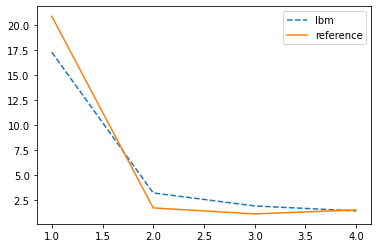

RMSE: 1.99
Pearson correlation: 0.996
Normalized Error (percent) : 18.92


In [13]:
#case b: HRT of 12 hrs
species = htr12[1]
lbm_htr12 = htr12[2]
experimental_htr12 = htr12[3]
plt.plot(species, lbm_htr12, '--', species, experimental_htr12, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.show()

#RMSE: root mean squared  error HTR 12h
y_true = experimental_htr12
y_pred = lbm_htr12
rmse_val_htr12_b = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.2f' % rmse_val_htr12_b)

#Pearson's correlation
corr, _ = pearsonr(experimental_htr12, lbm_htr12)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((lbm_htr12 - experimental_htr12)**2)))
b = np.sqrt(np.sum((experimental_htr12)**2))
err_12 = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err_12)

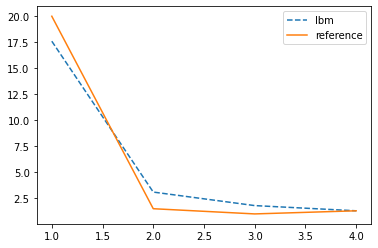

RMSE: 1.497
Pearsons correlation: 0.996
Error (percent) : 14.88


In [14]:
#case c: HRT of 16 hrs
species = htr16[1]
lbm_htr16 = htr16[2]
experimental_htr16 = htr16[3]
plt.plot(species, lbm_htr16, '--', species, experimental_htr16, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.show()

#RMSE: root mean squared  error HTR 16h
y_true = experimental_htr16
y_pred = lbm_htr16
rmse_val_htr16_b = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' % rmse_val_htr16_b)

#Pearson's correlation
corr, _ = pearsonr(experimental_htr16, lbm_htr16)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((lbm_htr16 - experimental_htr16)**2)))
b = np.sqrt(np.sum((experimental_htr16)**2))
err_16 = (a/b)*100
print ('Error (percent) : %.2f' % err_16)

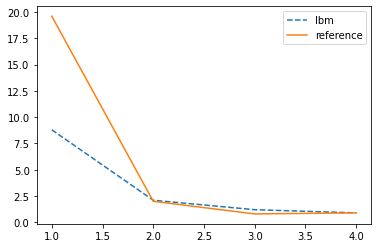

RMSE: 5.404
Pearsons correlation: 0.997
Normalized Error (percent) : 54.76
Mean error: 28.075


In [15]:
#case d: HRT of 24 hrs
species = htr24[1]
lbm_htr24 = htr24[2]
experimental_htr24 = htr24[3]
plt.plot(species, lbm_htr24, '--', species, experimental_htr24, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.show()

#RMSE: root mean squared  error HTR 24h
y_true = experimental_htr24
y_pred = lbm_htr24
rmse_val_htr24_b = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val_htr24_b)

#Pearson's correlation
corr, _ = pearsonr(experimental_htr24, lbm_htr24)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((lbm_htr24 - experimental_htr24)**2)))
b = np.sqrt(np.sum((experimental_htr24)**2))
err_24 = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err_24)

error_mean = np.concatenate(([err_8], [err_12], [err_16], [err_24]))
print('Mean error: %.3f'% np.mean(error_mean))

### Krastev, Falcucci (2019)

Krastev, V. K., & Falcucci, G. (2019). [Evaluating the electrochemical and power performances of microbial fuel cells across physical scales: A novel numerical approach](https://www.sciencedirect.com/science/article/abs/pii/S036031991833893X). International Journal of Hydrogen Energy, 44(9), 4468-4475.

*In this paper, a LBM numerical model for the prediction of Microbial Fuel Cells (MFC) performance was proposed. The model was able to account for the evolution in time of the main parameters related to MFC operation: namely, pH, bacteria activity, current density and it is able to predict the trends of polarization and power curves. The results of the model were compared to experimental data, highlighting the accuracy and flexibility of the proposed model.*

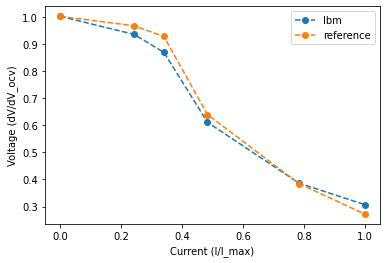

RMSE: 0.033
Pearson correlation: 0.997
Normalized Error (percent) : 4.34


In [16]:
# case a: voltage x current
krastev = pd.read_csv('krastev_2019.csv', encoding='utf-8', sep=';', header=None)
current = krastev[0]
experimental = krastev[1]
lbm = krastev[2]

plt.plot(current, lbm, 'o--', current, experimental, '--o')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('Current (I/I_max)')
plt.ylabel('Voltage (dV/dV_ocv)')
plt.show()

#RMSE: root mean squared  error  
y_true = experimental
y_pred = lbm
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((y_true - y_pred)**2)))
b = np.sqrt(np.sum((y_true)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

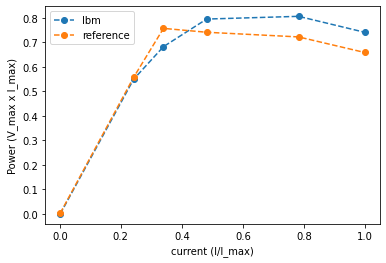

RMSE: 0.061
Pearsons correlation: 0.980
Normalized Error (percent) : 9.67


In [17]:
# case b: power x current
krastev = pd.read_csv('krastev_2019_power.csv', encoding='utf-8', sep=';', header=None)
current = krastev[0]
experimental = krastev[1]
lbm = krastev[2]

plt.plot(current, lbm, 'o--', current, experimental, 'o--')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('current (I/I_max)')
plt.ylabel('Power (V_max x I_max)')
plt.show()

#RMSE: root mean squared  error  
y_true = experimental
y_pred = lbm
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((y_true - y_pred)**2)))
b = np.sqrt(np.sum((y_true)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

### Dapelo et al. (2019)

Dapelo, D., Trunk, R., Krause, M. J., & Bridgeman, J. (2019). 
[Towards Lattice-Boltzmann modelling of unconfined gas mixing in anaerobic digestion](https://www.sciencedirect.com/science/article/pii/S0045793018306728). Computers & Fluids, 180, 11-21. 

*A LB model to simulate gas mixing in anaerobic digestion was developed and described in this study. Euler–Lagrange multiphase, non-Newtonian and turbulence modelling were applied jontly with a novel hybrid boundary condition. The model was validated in a laboratory-scale framework and flow patterns were assessed through Particle Imaging Velocimetry (PIV) and Positron-Emission Particle Tracking (PEPT). The model is shown to reproduce the experimental flow patterns with fidelity in both qualitative and quantitative terms.*

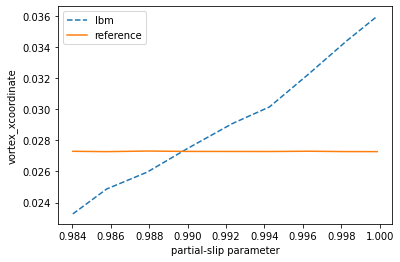

RMSE: 0.005
Pearson correlation: -0.401
Normalized Error (percent) : 16.67


In [18]:
#case a: x coordinate

dapelo = pd.read_csv('dapelo2019_xcoordinate.csv', encoding='utf-8', sep=';', header=None)
x = dapelo[0]
experimental = dapelo[1]
lbm = dapelo[2]

plt.plot(x, lbm, '--', x, experimental, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('partial-slip parameter')
plt.ylabel('vortex_xcoordinate')
plt.show()

#RMSE: root mean squared  error  B
from sklearn.metrics import mean_squared_error
y_true = experimental
y_pred = lbm
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(experimental, lbm)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

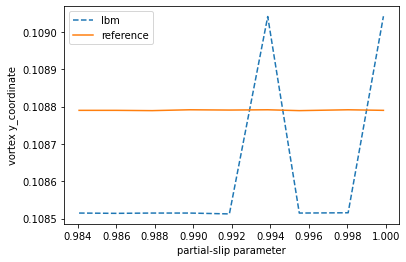

RMSE: 0.00027
Pearson correlation: 0.204
Normalized Error (percent) : 0.25


In [19]:
#case b: y coordinate
dapelo = pd.read_csv('dapelo2019_ycoordinate.csv', encoding='utf-8', sep=';', header=None)
x = dapelo[0]
experimental = dapelo[1]
lbm = dapelo[2]

plt.plot(x, lbm, '--', x, experimental, '-')
plt.legend(['lbm', 'reference'], loc = 'best')
plt.xlabel('partial-slip parameter')
plt.ylabel('vortex y_coordinate')
plt.show()

#RMSE: root mean squared  error  B
from sklearn.metrics import mean_squared_error
y_true = experimental
y_pred = lbm
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.5f' %rmse_val )

#Pearson corr
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(experimental, lbm)
print('Pearson correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)

### Delavar, Wang (2020)

Delavar, M. A., & Wang, J. (2020). [Pore‐scale modeling of competition and cooperation of multispecies biofilms for nutrients in changing environments](https://aiche.onlinelibrary.wiley.com/doi/abs/10.1002/aic.16919). AIChE Journal. doi:10.1002/aic.16919

*In this article, it was developed a pore‐scale model of integrated LBM and cellular automata to investigate competitive growth of aerobic nitrite and ammonium oxidizers in a bioreactor. The results showed that inlet nutrient concentrations have significant effects on maximum biofilm concentration, ratio of microorganisms' concentrations, growth pattern, and time. The local availability of oxygen could control the competition, resulting in different growth patterns. The coexistence of ammonium and nitrite in same inlet zone increased not only the biofilm concentration (7%) but also the ratio of microorganisms' concentrations (36%). Although this coexistence decreased the total biofilm concentration in some cases, it increased the growth rate about 25%. Changes of the maximum biomass concentration could change biofilm concentration of about 40% and microorganisms' concentrations ratio of about 30%. This framework provides a powerful tool to improve our understanding of dynamic interdependency of many complex microbial consortia systems with environments.*

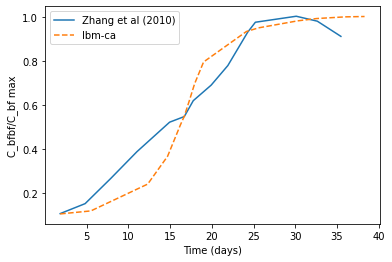

RMSE: 0.078
Pearsons correlation: 0.986
Normalized Error (percent) : 11.42


In [20]:
delavar = pd.read_csv('delavar2020a.csv', encoding='utf-8', sep=';', header=None)  ##experimental
delavar1 = pd.read_csv('delavar2020b.csv', encoding='utf-8', sep=';', header=None) ##model

x_a = delavar[0]
experimental = delavar[1]
x_b = delavar1[0]
lbm_b = delavar1[1]
plt.plot(x_a, experimental, '-', x_b, lbm_b, '--')
plt.legend(['Zhang et al (2010)', 'lbm-ca'], loc = 'best')
plt.xlabel('Time (days)')
plt.ylabel('C_bfbf/C_bf max')
plt.show()

#RMSE: root mean squared  error  B
y_true = experimental
y_pred = lbm_b
rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
print ('RMSE: %.3f' %rmse_val )

#Pearson corr
corr, _ = pearsonr(experimental, lbm_b)
print('Pearsons correlation: %.3f' % corr)

#Normalized error for model validation (%) 
a= np.sqrt(np.sum(((experimental - lbm_b)**2)))
b = np.sqrt(np.sum((experimental)**2))
err = (a/b)*100
print ('Normalized Error (percent) : %.2f' % err)